In [1]:
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from PIL import Image
import nibabel as nib


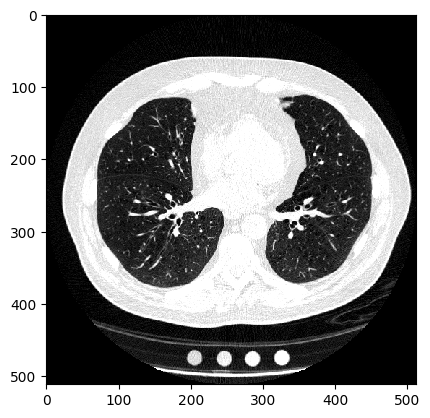

In [3]:
#load a NIfTI slice and plot it 
img = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/train_slices/inspiratory_BONE/COPDGene_H16787_BONE_211.nii.gz").get_fdata()

#plot the image
plt.imshow(np.rot90(img[:,:,0]), cmap = 'gray', vmin = -1000, vmax=0)
plt.show()

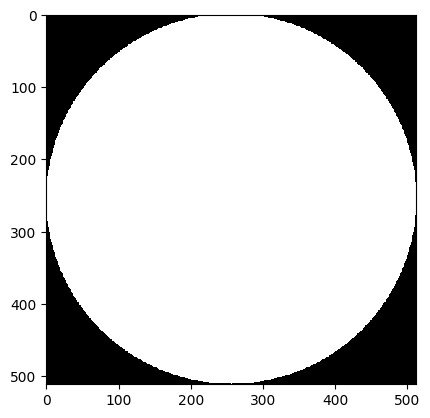

In [4]:
#Create a circular mask of the same size as the image
mask = np.zeros(img.shape)
width, height = img.shape[0], img.shape[1]
centx = width//2
centy = height//2

radius = min(centx, centy, width - centx, height - centy)
Y, X = np.ogrid[:height, :width]
dist_from_center = np.sqrt((X - centx)**2 + (Y-centy)**2)
mask = dist_from_center <= radius

#plot the mask
plt.imshow(np.rot90(mask), cmap = 'gray')
plt.show()

In [6]:
#Using the mask, create 10 random cropped patches of the images in the area where the mask is 1 and plot them
from sklearn.feature_extraction import image
patches = image.extract_patches_2d(img, patch_size=(128, 128))

#Extract the patches where the mask is 1
mask_patches = image.extract_patches_2d(mask, patch_size=(128, 128))

#FInd the indices of the patches where the mask is 1
mask_indices = np.where(mask_patches[0] == 1)
mask_indices = np.array(mask_indices)

#Index the patches where the mask is 1
mask_patches = patches[mask_indices[0]]

len(mask_patches)

5067

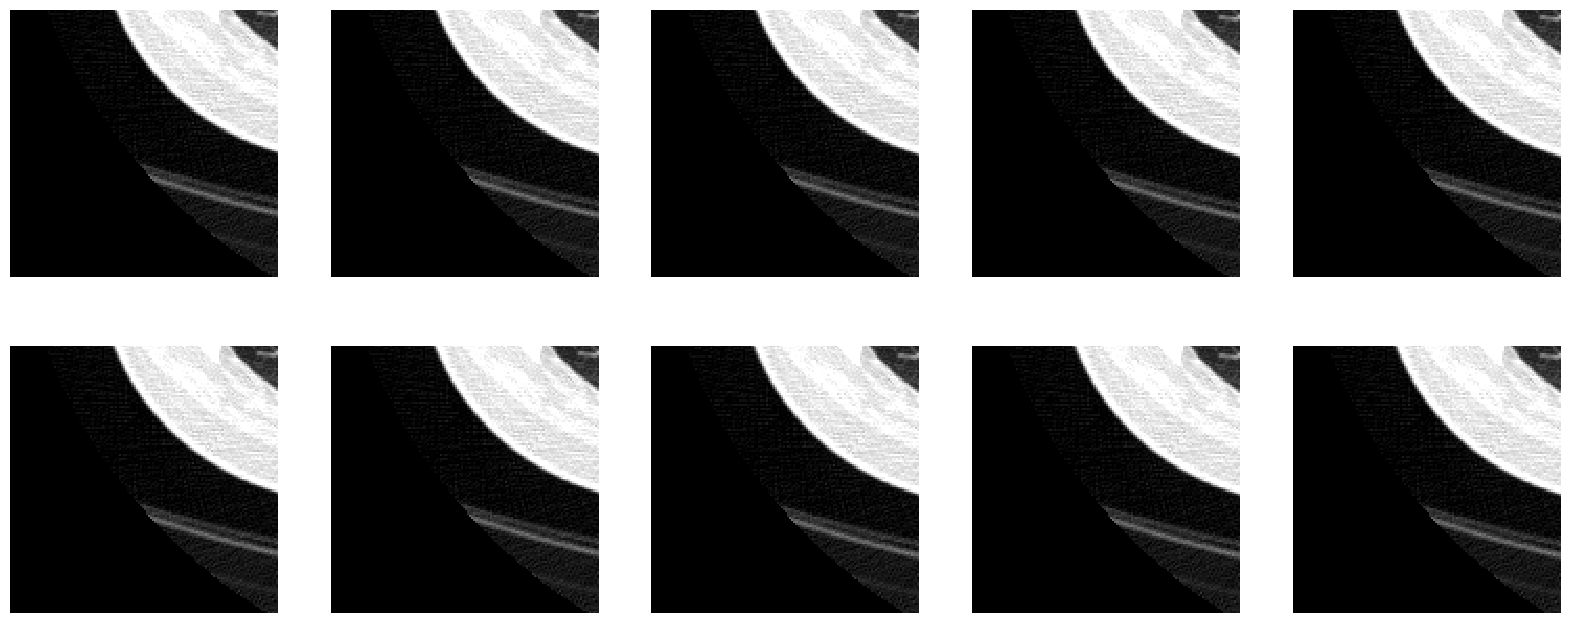

In [8]:
#Plot the patches
fig, ax = plt.subplots(2, 5, figsize = (20, 8))
for i in range(10):
    ax[i//5, i%5].imshow(np.rot90(mask_patches[i]), cmap = 'gray', vmin = -1000, vmax = 0)
    ax[i//5, i%5].axis('off')   
plt.show()


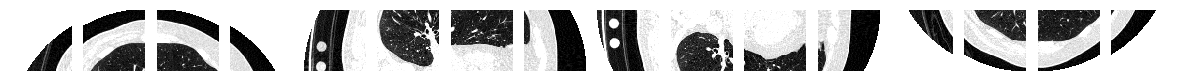

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import view_as_blocks
import nibabel as nib

# Create a circular mask
def create_circular_mask(h, w, center=None, radius=None):
	if center is None:  # use the middle of the image
		center = (int(w/2), int(h/2))
	if radius is None:  # use the smallest distance between the center and image walls
		radius = min(center[0], center[1], w-center[0], h-center[1])

	Y, X = np.ogrid[:h, :w]
	dist_from_center = np.sqrt((X - center[0])**2 + (Y - center[1])**2)

	mask = dist_from_center <= radius
	return mask

# Load the NIfTI file
nifti_file = '/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/train_slices/inspiratory_BONE/COPDGene_H16787_BONE_211.nii.gz'
nifti_data = nib.load(nifti_file)

# Extract image data
img = nifti_data.get_fdata()

# Assuming the image is 3D, select a single slice (e.g., the middle slice)
slice_index = img.shape[2] // 2
img_slice = img[:, :, slice_index]

# Create a circular mask
mask = create_circular_mask(*img_slice.shape)

# Apply the mask to the image slice
masked_img = img_slice * mask

# Extract non-overlapping patches
patch_size = (128, 128)
patches = view_as_blocks(np.rot90(masked_img), block_shape=patch_size)

# Flatten the patches array
patches = patches.reshape(-1, *patch_size)

# Filter out patches that are completely zero (outside the circular region)
patches = [patch for patch in patches if np.any(patch)]

# Plot the patches
fig, axes = plt.subplots(1, len(patches), figsize=(15, 15))
for ax, patch in zip(axes, patches):
	ax.imshow(patch, cmap='gray', vmin = -1000, vmax = 0)
	ax.axis('off')
plt.show()